In [1]:
#!/usr/bin/env python
"""
A script to show how to create your own time domain source model.
A simple damped Gaussian signal is defined in the time domain, injected into
noise in two interferometers (LIGO Livingston and Hanford at design
sensitivity), and then recovered.
"""

import numpy as np
import bilby

duration = 1638400
sampling_frequency = 2.0e-2
outdir = 'outdir'
label = 'LISA_signal'

In [6]:
injection_parameters = dict(
    mass_1=3.6e6, mass_2=2.9e6, a_1=0.9, a_2=0.8, tilt_1=0.0, tilt_2=0.0,
    phi_12=1.7, phi_jl=0.3, luminosity_distance=1000., theta_jn=0.4, psi=0.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                          reference_frequency=1.0e-4,
                          minimum_frequency=1.0e-4)

# call the waveform_generator to create our waveform model.
waveform = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    start_time=injection_parameters['geocent_time'] - duration)

print(len(waveform.frequency_array))
print(waveform.time_array)

16385
[1.12462124e+09 1.12462129e+09 1.12462134e+09 ... 1.12625949e+09
 1.12625954e+09 1.12625959e+09]


In [41]:
# inject the signal into three interferometers
ifos = bilby.gw.detector.InterferometerList(['H1'])

# for interferometer in ifos:
#     interferometer.power_spectral_density = \
#         bilby.gw.detector.PowerSpectralDensity(
#             psd_file="example_aligo.txt")   
# ifos.set_strain_data_from_power_spectral_densities(
#     sampling_frequency=sampling_frequency, duration=duration,
#     start_time=injection_parameters['geocent_time'] - duration )

ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - duration)
ifos.inject_signal(waveform_generator=waveform,
                   parameters=injection_parameters)


17:22 bilby INFO    : Injected signal in H1:
17:22 bilby INFO    :   optimal SNR = 0.00
17:22 bilby INFO    :   matched filter SNR = nan+nanj
17:22 bilby INFO    :   mass_1 = 3600000.0
17:22 bilby INFO    :   mass_2 = 2900000.0
17:22 bilby INFO    :   a_1 = 0.9
17:22 bilby INFO    :   a_2 = 0.8
17:22 bilby INFO    :   tilt_1 = 0.0
17:22 bilby INFO    :   tilt_2 = 0.0
17:22 bilby INFO    :   phi_12 = 1.7
17:22 bilby INFO    :   phi_jl = 0.3
17:22 bilby INFO    :   luminosity_distance = 1000.0
17:22 bilby INFO    :   theta_jn = 0.4
17:22 bilby INFO    :   psi = 0.659
17:22 bilby INFO    :   phase = 1.3
17:22 bilby INFO    :   geocent_time = 1126259642.413
17:22 bilby INFO    :   ra = 1.375
17:22 bilby INFO    :   dec = -1.2108


[{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

17:22 bilby INFO    : Running for label 'LISA_signal', output will be saved to 'outdir'
17:22 bilby INFO    : Using LAL version Branch: None;Tag: lalsuite-v6.62;Id: a75e6c243c5695e1abdcc4e5d91f623cf0db1d22;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
17:22 bilby INFO    : Search parameters:
17:22 bilby INFO    :   mass_1 = Uniform(minimum=1000000.0, maximum=9000000.0, name='mass_1', latex_label='$m_1$', unit=None, boundary=None)
17:22 bilby INFO    :   mass_2 = Uniform(minimum=1000000.0, maximum=9000000.0, name='mass_2', latex_label='$m_2$', unit=None, boundary=None)
17:22 bilby INFO    :   geocent_time = Uniform(minimum=1126259642.3130002, maximum=1126259642.513, name=None, latex_label='$t_c$', unit='s', boundary=None)
17:22 bilby INFO    :   a_1 = 0.9
17:22 bilby INFO    :   a_2 = 0.8
17:22 bilby INFO    :   tilt_1 = 0.0
17:22 bilby INFO    :   tilt_2 = 0.0
17:22 bilby INFO    :   theta_jn = 0.4
17:22 bilby INFO    :   phase = 1.3
17:22 bilby INFO    : 

0it [00:00, ?it/s]

17:22 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 512, 'first_update': None, 'walks': 30, 'npdim': None, 'rstate': None, 'queue_size': None, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 2.0, 'facc': 0.5, 'slices': 5, 'update_interval': 307, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x2b630a9927f0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None}
17:22 bilby INFO    : Checkpoint every n_check_point = 30000
17:22 bilby INFO    : Using dynesty version 1.0.0
17:22 bilby INFO    : Reading resume file outdir/LISA_signal_resume.pickle
17:22 bilby INF

1206it [00:09, 128.72it/s, bound:0 ncall:2955 eff:58.1% logz-ratio=-0.00+/-nan dlogz:0.000>0.10] 

17:22 bilby INFO    : Sampling time: 0:00:29.634444
17:22 bilby INFO    : Summary of results:
nsamples: 1718
log_noise_evidence:  0.000
log_evidence: -0.001 +/-    nan
log_bayes_factor: -0.001 +/-    nan



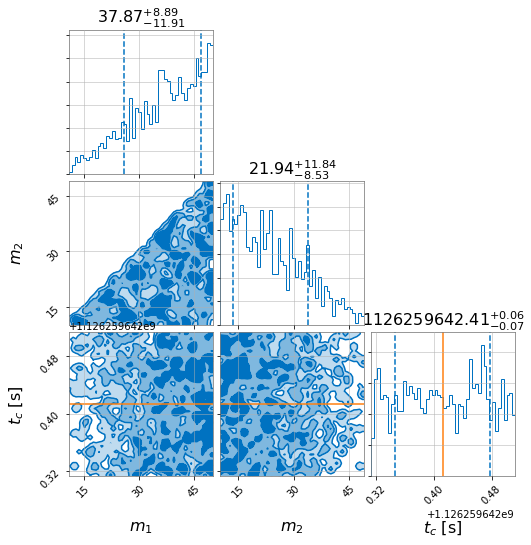

In [42]:
#  create the priors
priors = dict()
for key in ['a_1', 'a_2', 'tilt_1', 'tilt_2', 'theta_jn', 'phase', 'psi', 'ra',
            'dec', 'phi_12', 'phi_jl', 'luminosity_distance']:
    priors[key] = injection_parameters[key]
    
priors['mass_1'] = bilby.core.prior.Uniform(1.0e6, 9.0e6, name='mass_1')
priors['mass_2'] = bilby.core.prior.Uniform(1.0e6, 9.0e6, name='mass_2')
priors['geocent_time'] = bilby.core.prior.Uniform(
    injection_parameters['geocent_time'] - 0.1,
    injection_parameters['geocent_time'] + 0.1, latex_label='$t_c$', unit='s')

# define likelihood
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(ifos, waveform)

# launch sampler
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', npoints=512,
    injection_parameters=injection_parameters, outdir=outdir, label=label)

result.plot_corner()


In [43]:
import matplotlib.pyplot as plt
f_psd = np.loadtxt("example_aligo.txt")
np.shape(f_psd)
f = np.zeros([521728,1])
psd = np.zeros([521728,1])

f = f_psd[:,0]
psd = f_psd[:,1]

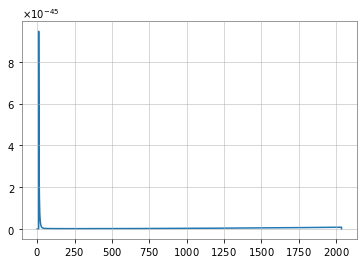

In [17]:
plt.plot(f,psd)

In [33]:
ff = np.linspace(1.0e-4, 1.0e-2, 16385)
psd_lisa =1.0e-60*np.ones([1, 16385])

psd_data = np.zeros([16385, 2])
psd_data[:,0] = np.transpose(ff)
psd_data[:,1] = np.transpose(psd_lisa[:,0])

np.savetxt('psd_lisa.txt', psd_data, delimiter=',')

TypeError: write() argument must be str, not numpy.ndarray